In [15]:
library(isdals)
library(ppcor)
data(bodyfat)

Loading required package: MASS



__help(bodyfat)__  
确定人体内的脂肪是昂贵且麻烦的，因为它涉及将人浸入水中。该数据集提供了20位年龄在20至34岁的健康女性的体脂，三头肌皮褶厚度，大腿围和手臂中部围的信息。如果模型可以提供可靠的体内脂肪量预测，则是可取的，因为需要进行测量 因为预测变量很容易获得。  

Fat:人体脂肪  
Triceps：三头肌皮褶测量  
Thigh:大腿围  
Midarm:中臂围  

In [2]:
detach()
attach(bodyfat)

              Fat   Triceps     Thigh    Midarm
Fat     1.0000000 0.8432654 0.8780896 0.1424440
Triceps 0.8432654 1.0000000 0.9238425 0.4577772
Thigh   0.8780896 0.9238425 1.0000000 0.0846675
Midarm  0.1424440 0.4577772 0.0846675 1.0000000


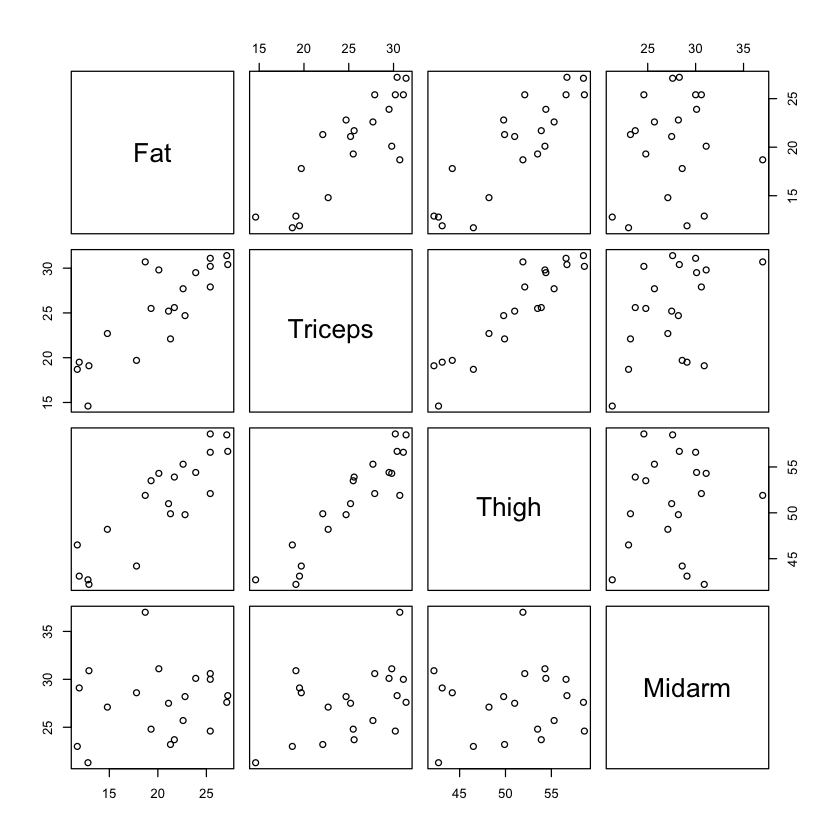

In [4]:
pairs( cbind( Fat, Triceps, Thigh, Midarm) )
print(cor( cbind( Fat, Triceps, Thigh, Midarm) ))

显然，Fat和Triceps高度相关，r = 0.8432654。 但是，Thigh也是如此，r = 0.8780896。

Since Tricepsand Thigh are also clearly related __r= 0.9238425__, we wonder if we can measure the correlation  of Fat and Triceps, after __controlling for or “partialling out” Thigh__.  We  first  try  to account  for the  effect of Thigh on both Fat and Triceps by regressing them on Thigh. __After we remove the contribution of Thigh__, we then find the correlation of Fat and Triceps. This is pretty easy to do; just use the lm() command.

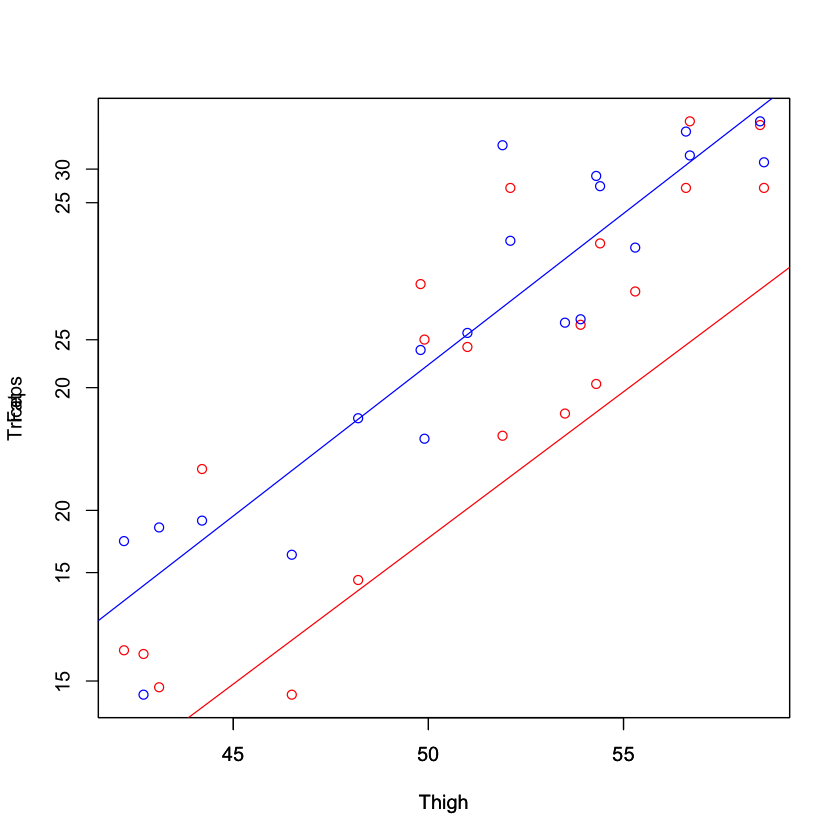

In [6]:
Fat.hat = predict(lm(Fat~Thigh))
Triceps.hat = predict(lm(Triceps~Thigh))
plot(Fat~Thigh, col='red')
par(new=TRUE)
plot(Triceps~Thigh, col='blue')
abline(lm(Fat~Thigh), col='red')
abline(lm(Triceps~Thigh), col='blue')

[1] 0.1749822


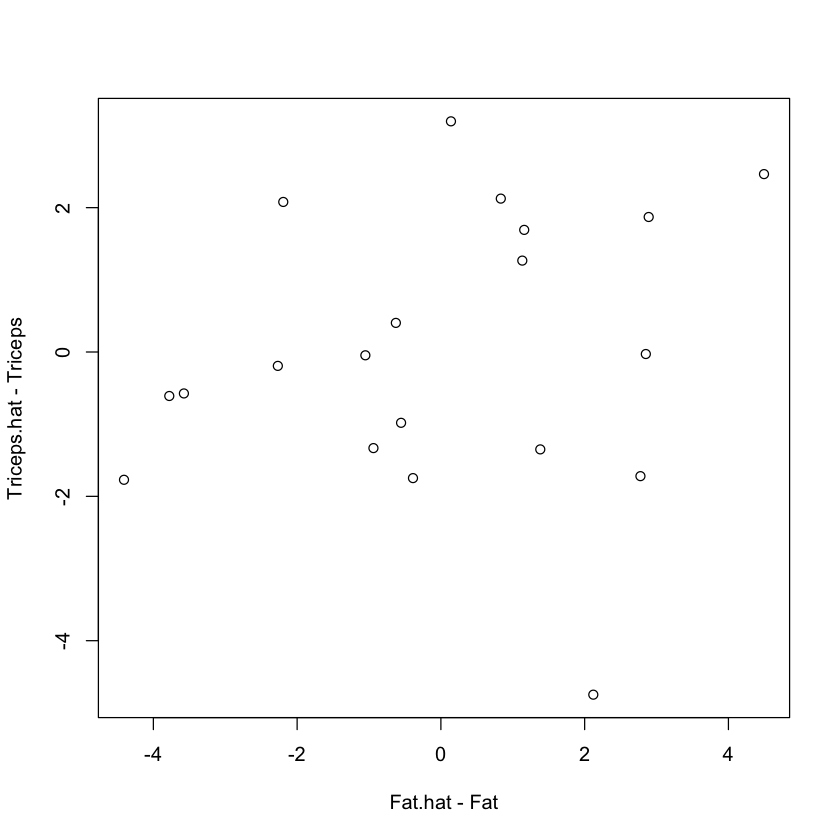

In [8]:
plot(Fat.hat-Fat, Triceps.hat-Triceps)
print(cor(Fat.hat-Fat, Triceps.hat-Triceps))

So, a great deal of the correlation between Fat and Triceps is accounted for by controlling for high circumference. What happens when we control for both Thigh and Midarm? We do the calculation ourselves, and confirm by using the pcor() routine.

In [17]:
Fat.hat= predict(lm(Fat~Thigh+Midarm))
Triceps.hat = predict( lm(Triceps~Thigh+Midarm) )
cor( (Fat-Fat.hat), (Triceps-Triceps.hat) )

[1] 0.33815

可以看到pcor 的 Fat-Triceps 列出同样的计算值

In [16]:
pcor( cbind( Fat, Triceps, Thigh, Midarm) )

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.3381500,-0.2665991,-0.3240520
Triceps,0.3381500,1.0000000,0.9963725,0.9955918
Thigh,-0.2665991,0.9963725,1.0000000,-0.9926612
Midarm,-0.3240520,0.9955918,-0.9926612,1.0000000
,Fat,Triceps,Thigh,Midarm
Fat,0.0000000,1.699111e-01,2.848944e-01,1.895628e-01
Triceps,0.1699111,0.000000e+00,1.490492e-18,7.071386e-18
Thigh,0.2848944,1.490492e-18,0.000000e+00,4.134178e-16
Midarm,0.1895628,7.071386e-18,4.134178e-16,0.000000e+00
,Fat,Triceps,Thigh,Midarm
